In [ ]:
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
files.upload()

Saving dag_details_download_rocket_local.json to dag_details_download_rocket_local.json


{'dag_details_download_rocket_local.json': b'[{"dag_id": "download_rocket_local", "run_id": "manual__2025-03-28T11:05:29.236229+00:00", "state": "success", "execution_date": "2025-03-28T11:05:29.236229+00:00", "start_date": "2025-03-28T11:05:29.385150+00:00", "end_date": "2025-03-28T11:05:41.682891+00:00"}, {"dag_id": "download_rocket_local", "run_id": "manual__2025-03-28T11:05:11.396589+00:00", "state": "success", "execution_date": "2025-03-28T11:05:11.396589+00:00", "start_date": "2025-03-28T11:05:11.630535+00:00", "end_date": "2025-03-28T11:05:24.379799+00:00"}, {"dag_id": "download_rocket_local", "run_id": "manual__2025-03-28T11:04:45.797447+00:00", "state": "success", "execution_date": "2025-03-28T11:04:45.797447+00:00", "start_date": "2025-03-28T11:04:46.597533+00:00", "end_date": "2025-03-28T11:04:59.697460+00:00"}, {"dag_id": "download_rocket_local", "run_id": "manual__2025-03-28T10:06:52.485058+00:00", "state": "success", "execution_date": "2025-03-28T10:06:52.485058+00:00", "

In [5]:
with open('dag_details_download_rocket_local.json') as f:
    data = json.load(f)

In [6]:
df = pd.DataFrame(data)

In [10]:
df.dtypes

,0
dag_id,object
run_id,object
state,object
execution_date,object
start_date,object
end_date,object


In [14]:
# Преобразование строк дат
date_cols = ['execution_date', 'start_date', 'end_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='ISO8601')

In [15]:
# Добавление длительности выполнения
df['duration'] = (df['end_date'] - df['start_date']).dt.total_seconds()

In [16]:
print("Общая информация:")
print(f"Всего выполнений: {len(df)}")
print(f"Успешных выполнений: {len(df[df['state'] == 'success'])}")
print(f"Неудачных выполнений: {len(df[df['state'] == 'failed'])}")
print(f"Процент успешных выполнений: {len(df[df['state'] == 'success']) / len(df) * 100:.1f}%")

print("\nСтатистика по длительности выполнения (секунды):")
print(df['duration'].describe())


Общая информация:
Всего выполнений: 23
Успешных выполнений: 4
Неудачных выполнений: 19
Процент успешных выполнений: 17.4%

Статистика по длительности выполнения (секунды):
count    23.000000
mean      7.651366
std       3.530083
min       2.849195
25%       4.544053
50%       7.045725
75%      10.125150
max      14.200761
Name: duration, dtype: float64


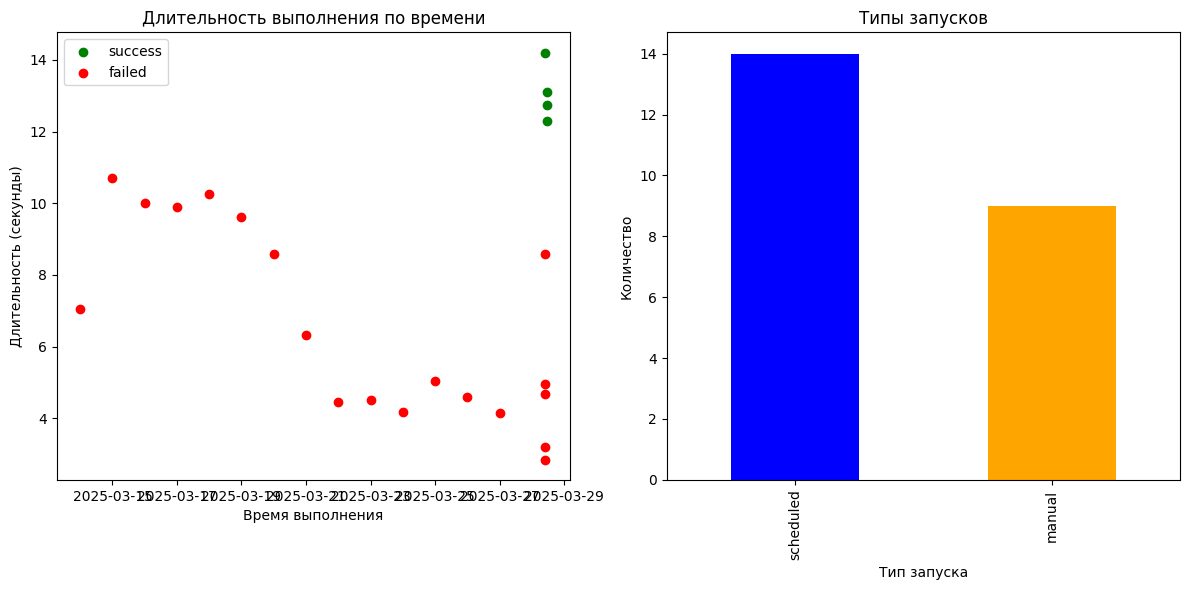

In [18]:
# Визуализация
plt.figure(figsize=(12, 6))

# График состояний по времени выполнения
plt.subplot(1, 2, 1)
for state, color in [('success', 'green'), ('failed', 'red')]:
    subset = df[df['state'] == state]
    plt.scatter(subset['execution_date'], subset['duration'], color=color, label=state)
plt.title('Длительность выполнения по времени')
plt.xlabel('Время выполнения')
plt.ylabel('Длительность (секунды)')
plt.legend()

# График типов запуска
plt.subplot(1, 2, 2)
run_types = df['run_id'].str.split('__').str[0].value_counts()
run_types.plot(kind='bar', color=['blue', 'orange'])
plt.title('Типы запусков')
plt.xlabel('Тип запуска')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()